In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


In [10]:
# Set the API base URL. Need to set units equal to metric to get Temp in Celsius
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | lebanon
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | anloga
Processing Record 10 of Set 1 | vadso
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | trincomalee
Processing Record 13 of Set 1 | mandal
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | fereydun kenar
Processing Record 22 of Set 1 | isk

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,25.99,78,100,6.17,CC,1696862862
1,yellowknife,62.4560,-114.3525,5.79,100,40,4.12,CA,1696862607
2,lebanon,36.2081,-86.2911,14.74,70,75,5.66,US,1696862864
3,bredasdorp,-34.5322,20.0403,15.12,77,90,7.69,ZA,1696862865
4,bethel,41.3712,-73.4140,13.59,66,75,3.60,US,1696862865


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,25.99,78,100,6.17,CC,1696862862
1,yellowknife,62.4560,-114.3525,5.79,100,40,4.12,CA,1696862607
2,lebanon,36.2081,-86.2911,14.74,70,75,5.66,US,1696862864
3,bredasdorp,-34.5322,20.0403,15.12,77,90,7.69,ZA,1696862865
4,bethel,41.3712,-73.4140,13.59,66,75,3.60,US,1696862865


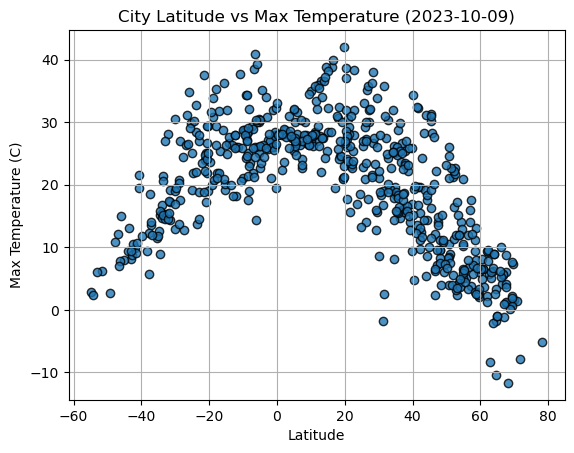

In [37]:
# Build scatter plot for latitude vs. temperature
# Note that we want an alpha value so we can see points that overlap
scatter = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha = 0.8, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2023-10-09)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

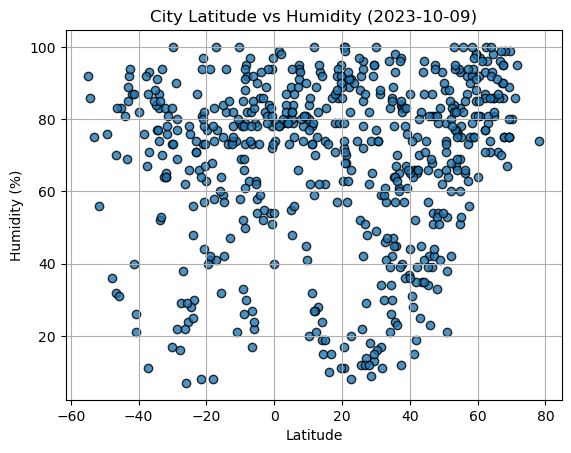

In [39]:
# Build the scatter plots for latitude vs. humidity
scatter = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha = 0.8, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2023-10-09)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

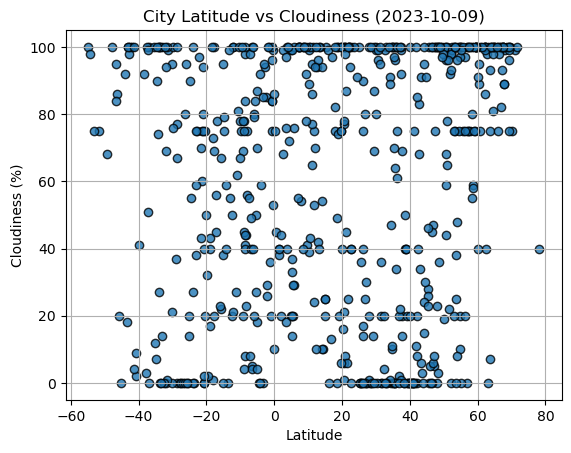

In [36]:
# Build the scatter plots for latitude vs. cloudiness
scatter = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha = 0.8, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2023-10-09)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

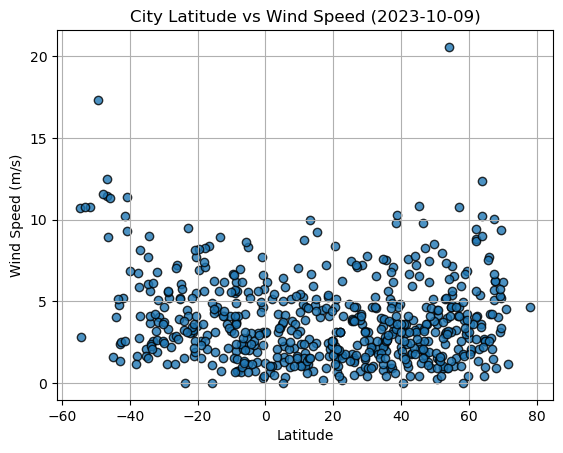

In [41]:
# Build the scatter plots for latitude vs. wind speed
scatter = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha = 0.8, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2023-10-09)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [111]:
# Define a function to create Linear Regression plots
def linregress_fn(x_axis,y_axis):
    (slope, intercept, r, p, err) = linregress(x_axis,y_axis)
    # Round the slope and intercept outputs to 2 digits to make equation simpler
    slope = round(slope,2)
    intercept = round(intercept,2)
    # Create line equation using linregress() outputs
    line_eqn = (slope*x_axis) + intercept
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,line_eqn, color = "red")
    # Plot equation at min(x_axis),min(y_axis) so equation displays in bottom left corner for all plots
    plt.text(min(x_axis),min(y_axis),f"y = {slope}x + {intercept}", color = "red", size = 15)
    print(f"The r value is: {r}")


In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Use loc() to ensure we only return city data where latitude is greater than or equal to 0
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,5.79,100,40,4.12,CA,1696862607
2,lebanon,36.2081,-86.2911,14.74,70,75,5.66,US,1696862864
4,bethel,41.3712,-73.4140,13.59,66,75,3.60,US,1696862865
8,anloga,5.7947,0.8973,28.09,75,76,5.86,GH,1696862867
9,vadso,70.0744,29.7487,1.49,80,75,6.17,NO,1696862868


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,25.99,78,100,6.17,CC,1696862862
3,bredasdorp,-34.5322,20.0403,15.12,77,90,7.69,ZA,1696862865
5,ushuaia,-54.8000,-68.3000,2.81,92,100,10.73,AR,1696862796
6,port-aux-francais,-49.3500,70.2167,2.76,76,68,17.31,TF,1696862866
7,waitangi,-43.9535,-176.5597,9.34,81,92,4.02,NZ,1696862867


The r value is: -0.8046307521242501


Text(0, 0.5, 'Max Temp')

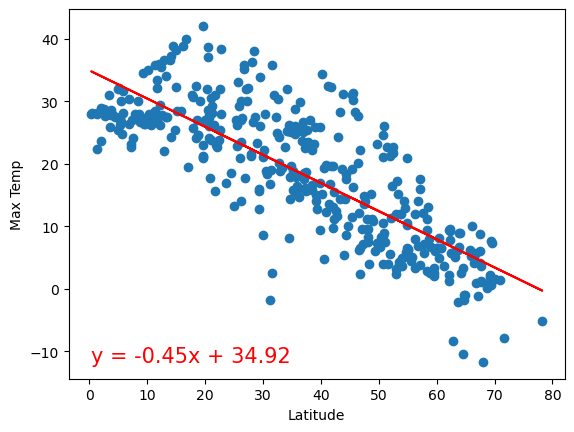

In [112]:
# Linear regression on Northern Hemisphere
linregress_fn(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


The r value is: 0.7354789839191971


Text(0, 0.5, 'Max Temp')

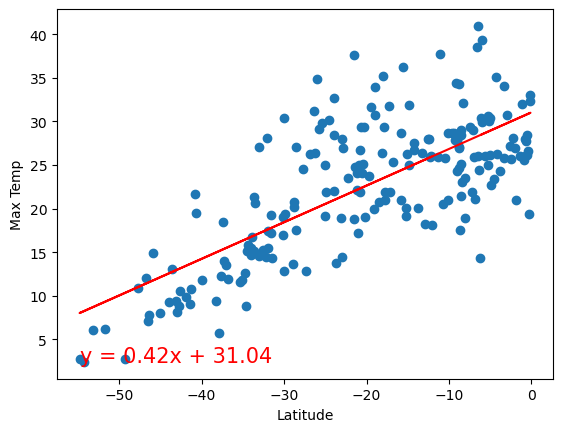

In [113]:
# Linear regression on Southern Hemisphere
linregress_fn(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

**Discussion about the linear relationship:**

In regards to the northern and southern hemispheres, we can see that there is a relatively strong correlation between latitude and max temp of a city. As expected, the highest max temperatures should occur near the equator, where the latitude is 0. The further away you get from the equator, the lower the max temp should be. The r values further show this correlation to be true, as we have a negative r value when moving away from the equator in the north, and a positive r value when moving towards the equator in the south.

The r value is: 0.1466822059805132


Text(0, 0.5, 'Humidity')

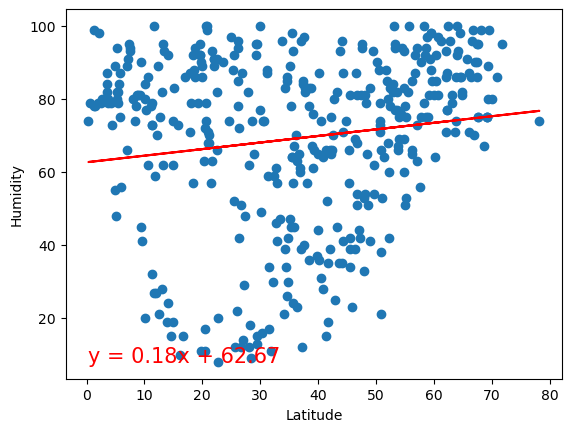

In [117]:
# Humidity vs Latitude Northern Hemisphere
linregress_fn(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")


The r value is: 0.02531712859832658


Text(0, 0.5, 'Humidty')

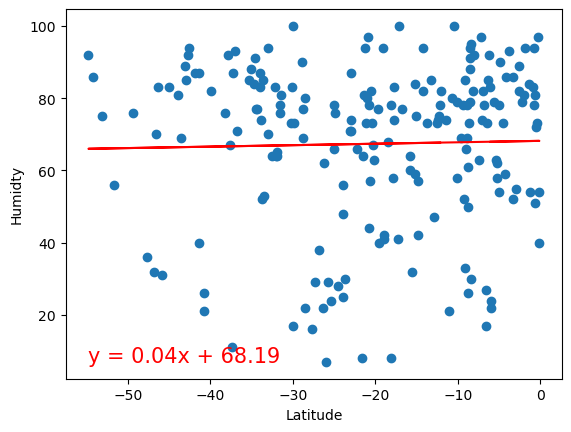

In [118]:
# Humidity vs Latitude Southern Hemisphere
linregress_fn(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidty")

**Discussion about the linear relationship:**

Looking at the line of best fit for both the northern and southern hemispheres in regards to latitude vs humidity, we can see there is little to no correlation. It appears that the humidity of each city has little to no relation to the latitude of the city. Both r-values are very low, thus showing how the correlation is very weak. Also, looking at the scatterplot, we can see there is no pattern.

The r value is: 0.16331329596558916


Text(0, 0.5, 'Cloudiness')

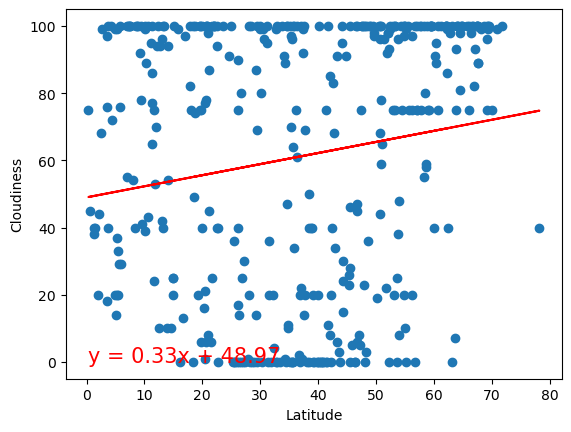

In [119]:
# Cloudiness vs Latitude Northern Hemisphere
linregress_fn(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r value is: -0.05019555595927124


Text(0, 0.5, 'Cloudiness')

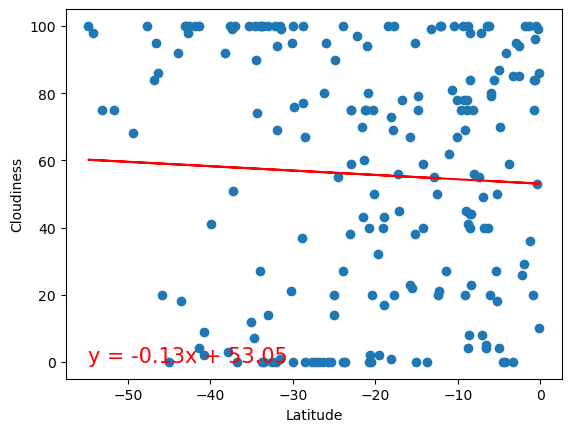

In [120]:
# Cloudiness vs Latitude Southern Hemisphere
linregress_fn(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:**

Similar to the humidity vs latitude scatterplots, there is little to no correlation between the cloudiness and the latitude of the city. The r-values are very small, further proving the lack of correlation.

The r value is: 0.18654304481463457


Text(0, 0.5, 'Wind Speed')

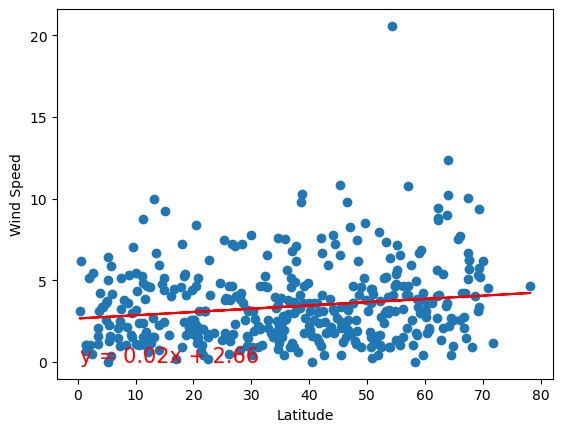

In [121]:
# Wind Speed vs Latitude Northern Hemisphere
linregress_fn(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The r value is: -0.374684450170339


Text(0, 0.5, 'Wind Speed')

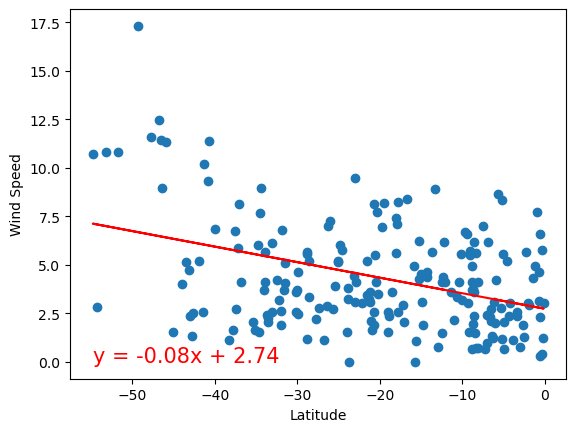

In [122]:
# Wind Speed vs Latitude Southern Hemisphere
linregress_fn(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:**

Once again, according to the r-values there appears to be little to no correlation between the above 2 scatterplots. The wind speed does not seem to be strongly dependant on the latitude of the cities. However, when looking at the plot itself, we can see that there are a only a few major outliers in both the northern and southern hemispheres. There could be many reasons for these outliers as there could be strong wind gusts in any given day in any city. With that being said, the outliers appear to skew the results. If we were to remove them, we could see that regardless of a city's latitude, the wind speed usually sits from 0 to 10 m/s. In this particular case, wind speed usually tends to be low regardless of latitude.